In [1]:
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.cm, matplotlib.colors
from sklearn import metrics
from sklearn.cluster import DBSCAN

import matplotlib.gridspec as gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan

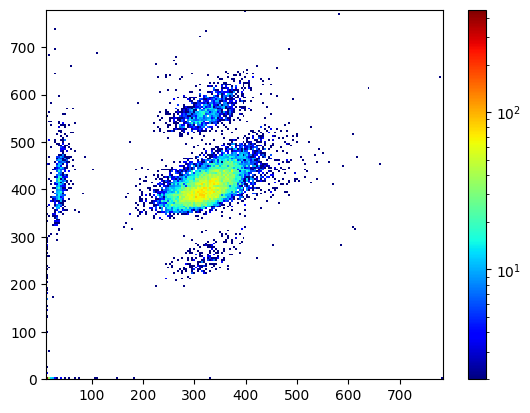

In [2]:
fig, ax = plt.subplots()
data1 = np.loadtxt('c12_data.txt', delimiter='\t')
counts, xedges, yedges, im = ax.hist2d(data1[:,0], data1[:,1], bins = 200, cmap='jet', norm = LogNorm())
fig.colorbar(im, ax=ax)

In [3]:
db = DBSCAN(eps=50, min_samples=100).fit(data1)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 121


In [5]:
dbscan = DBSCAN(eps=0.3, min_samples=75)
dbscan.fit(data1)
#eps (promień sąsiedztwa) i min_samples (minimalna liczba punktów w sąsiedztwie)

DBSCAN(eps=0.3, min_samples=75)

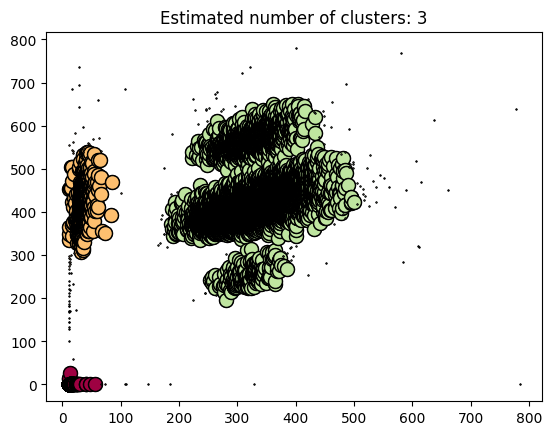

In [24]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        pass

    class_member_mask = labels == k
    xy = data1[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = data1[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=0.5,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

/home/kamil/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


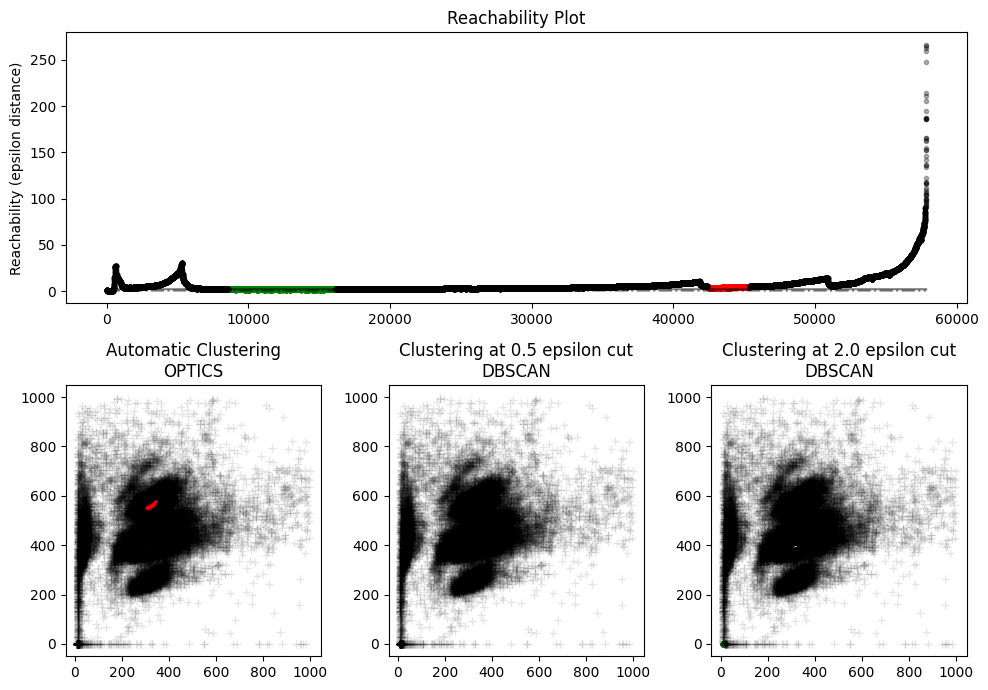

In [10]:
X = data2
clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g.", "r.", "b.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

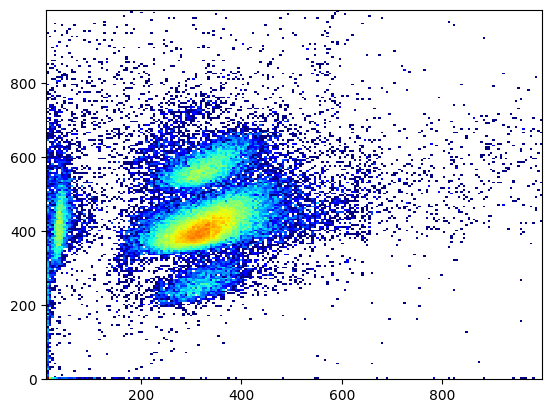

In [7]:
data2 = np.loadtxt('c12_noise_data.txt', delimiter='\t')
plt.hist2d(data2[:,0], data2[:,1], bins = 200, cmap='jet', norm = LogNorm())
plt.show()

In [13]:
db = DBSCAN(eps=10, min_samples=100).fit(data2)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 13225


In [9]:
dbscan = DBSCAN(eps=0.3, min_samples=75)
dbscan.fit(data1)
#eps (promień sąsiedztwa) i min_samples (minimalna liczba punktów w sąsiedztwie)

DBSCAN(eps=0.3, min_samples=75)

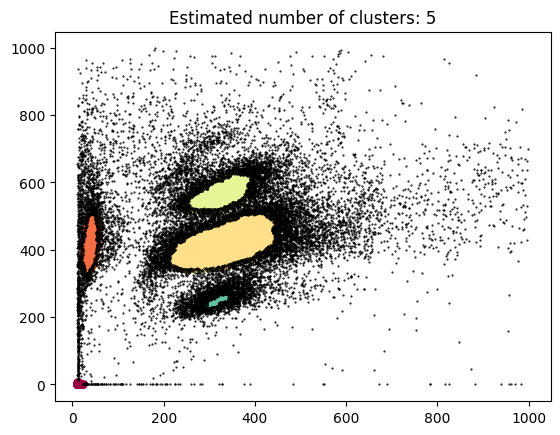

In [59]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        pass

    class_member_mask = labels == k
    xy = data2[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=5,
    )

    xy = data2[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        ".",
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=1,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

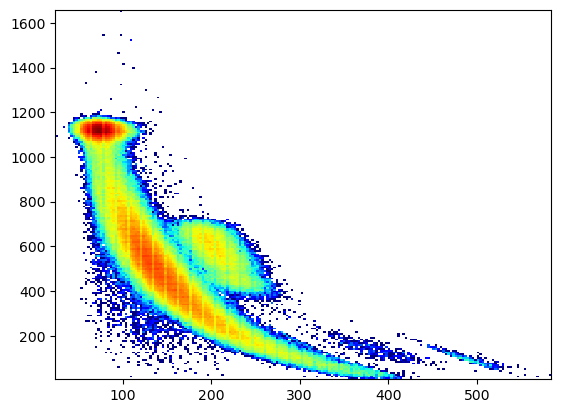

In [4]:
data3 = np.loadtxt('3N_forces_data.txt', delimiter='\t')
plt.hist2d(data3[:,0], data3[:,1], bins = 200, cmap='jet', norm = LogNorm())
plt.show()

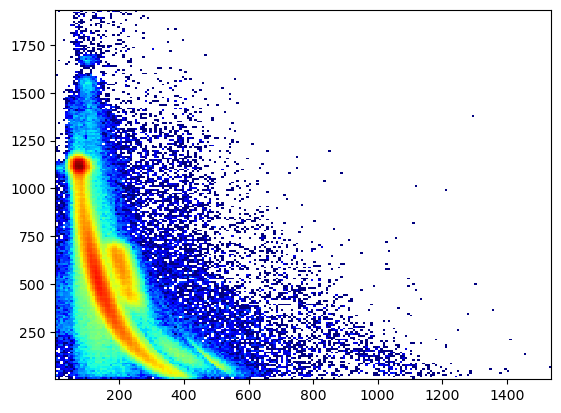

In [5]:
data4 = np.loadtxt('3N_forces_noise_data.txt', delimiter='\t')
plt.hist2d(data4[:,0], data4[:,1], bins = 200, cmap='jet', norm = matplotlib.colors.LogNorm())
plt.show()